# Predict stock prices using RNNs
Following Lilan Weng's [blog post](https://lilianweng.github.io/lil-log/2017/07/08/predict-stock-prices-using-RNN-part-1.html)
* [*her code*](https://github.com/lilianweng/stock-rnn)

### Variables
* ${W_i}$: Window i
* ${w}$: size of windows 
* ${p_i}$: stock price at end of day i


**Predict:** ${W_{t+1}}$
* where ${W_{t+1}} = (p_{(t+1)w}, p_{(t+1)w+1}, ..., p_{(t+2)w-1})$
* and ${W_{t}} = (p_{tw}, p_{tw+1}, ..., p_{(t+1)w-1})$

i.e., we learn a function $f(W_0, ..., W_t) \approx W_{t+1}$

**RNN:**
![](imgs/unrolled_RNN.png)

* `input_size`: number of timesteps (days) in a window
* `num_steps`: number of windows in a single training ex 

## 1 - Fetching and formatting the data
### 1.1 - Fetching
The [pandas](https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html) library is used for data access / manipulation

In [4]:
import os
import pandas as pd
#import matplotlib

DATA_DIR = "data"
SP500_LIST_PATH = os.path.join(DATA_DIR, "price-history.csv")
#print(os.path)

# df = DataFrame -- like a sql table in python
price_df = pd.read_csv(SP500_LIST_PATH, parse_dates=['Date'], index_col='Date')

In [2]:
# look at first 3 rows of data
price_df[['Date', 'Close']][:3]

,Date,Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999


Text(0, 0.5, 'Stock price ($)')

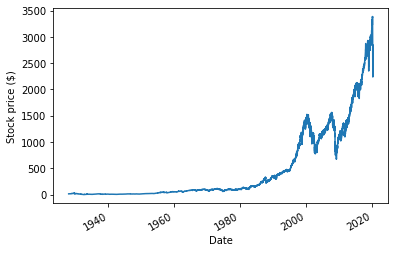

In [9]:
price_df['Close'].plot().set_ylabel("Stock price ($)")